In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import pandas as pd
import calendar
import plotly.graph_objects as go
import itertools

# SIR example

In [2]:
def plotdata_ex(t, s, i, e, a):
    # plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]

    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].plot(t, a, lw=3, label='Asymptomatic')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')

    ax[2].plot(s, i, lw=3, label='s, i trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infectious')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()
    


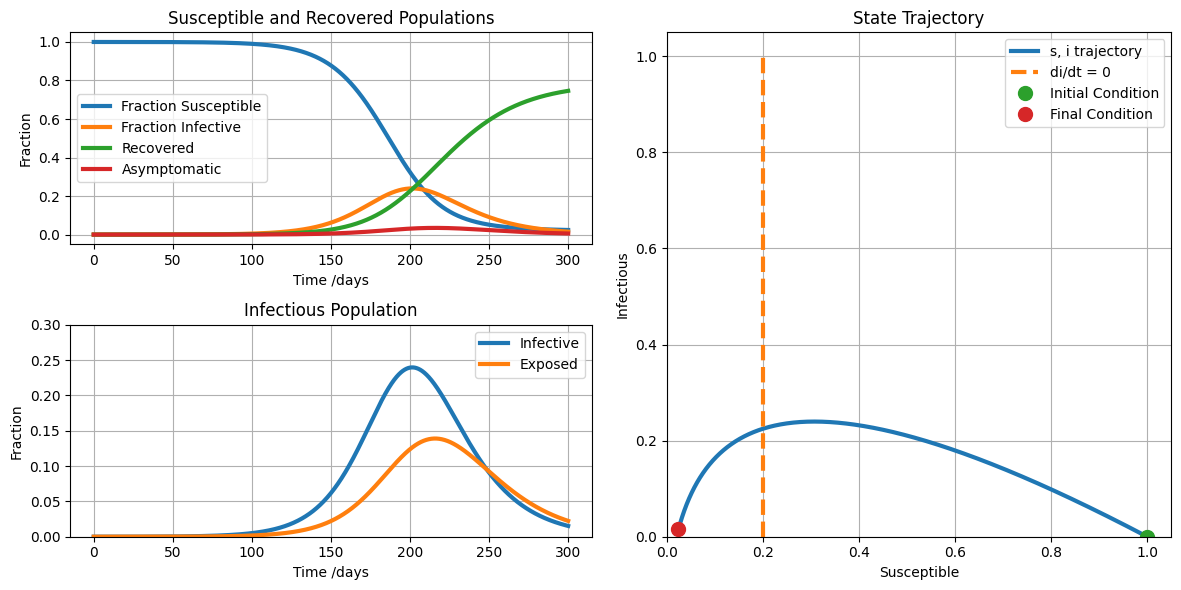

In [3]:
# parameter values
R0 = 5
t_incubation = 21
t_infective = 1/0.05882
#Proportion of those asymptomatic	
p = 0.2
u = 0

# initial number of infected and recovered individuals
e_initial = 1/20000
i_initial = 0.00
r_initial = 0.00
a_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial -a_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

# SEIR model differential equations.
def deriv(x, t, alpha, beta, gamma, p):
    s, e, i, r ,a = x
    dsdt = -(1-u)*beta * s * i
    dedt =  (1-u)*beta * s * i - alpha * e
    dadt = alpha * e *p - gamma * a
    didt = alpha * e *(1-p) - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt, dadt]

t = np.linspace(0, 300, 2000)
x_initial = s_initial, e_initial, i_initial, r_initial, a_initial
soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma, p))
s, e, i, r, a = soln.T

plotdata_ex(t, s, e, i, a)